In [98]:
import pandas as pd
import numpy as np
import seaborn as snb

In [99]:
with open('train.csv', 'r') as temp_f:
    col_count = [ len(l.split(",")) for l in temp_f.readlines() 

column_names = [i for i in range(0, max(col_count))]
train = pd.read_csv('train.csv',header=0, delimiter= ',')

In [100]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [101]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [103]:
train = pd.concat([train,(pd.get_dummies(train['Vehicle_Age']))],axis=1)
train.drop('Vehicle_Age', axis=1, inplace=True)

In [104]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0


C:\Users\ecroque\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

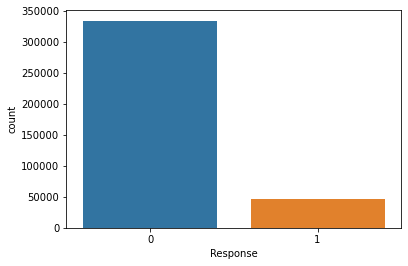

In [106]:
snb.countplot(train['Response'])

In [110]:
train= pd.concat([train,(pd.get_dummies(train['Gender']))],axis=1)
train.drop('Gender', axis=1, inplace= True)
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,...,< 1 Year,> 2 Years,Female,Male,Female,Male,Female,Male,Female,Male
0,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,...,0,1,0,1,0,1,0,1,0,1
1,2,76,1,3.0,0,No,33536.0,26.0,183,0,...,0,0,0,1,0,1,0,1,0,1
2,3,47,1,28.0,0,Yes,38294.0,26.0,27,1,...,0,1,0,1,0,1,0,1,0,1
3,4,21,1,11.0,1,No,28619.0,152.0,203,0,...,1,0,0,1,0,1,0,1,0,1
4,5,29,1,41.0,1,No,27496.0,152.0,39,0,...,1,0,1,0,1,0,1,0,1,0


In [111]:
train=pd.concat([train,(pd.get_dummies(train['Vehicle_Damage']))], axis=1)
train.drop('Vehicle_Damage', inplace = True, axis = 1)
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,...,Female,Male,Female,Male,Female,Male,Female,Male,No,Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,...,0,1,0,1,0,1,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,...,0,1,0,1,0,1,0,1,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,...,0,1,0,1,0,1,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,...,0,1,0,1,0,1,0,1,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,...,1,0,1,0,1,0,1,0,1,0
